# 📘 Notebook 02 — Model Evaluation & Comparison

This notebook evaluates the **custom Gradient Descent Linear Regression model**
saved from `src/train.py` and compares it with **scikit-learn's LinearRegression**.

Goals:
- Load saved model (`model_v2.npz`)
- Prepare standardized test data using stored mean/std
- Make predictions using the custom model
- Visualize predicted vs actual values
- Plot residuals and error distribution
- Compare performance with `sklearn.LinearRegression`
- Summarize insights for the final report

**NOTE:** Model must be trained before running this notebook:

```bash
python3 -m src.train

In [1]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.model_io import load_model
from src.preprocessing import compute_standardization_params, apply_standardization
from src.data_loader import train_test_split_data
from src.feature_engineering import apply_feature_engineering
from src.config import Config
from src.evaluation import evaluate_regression

from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")

In [2]:
# Load Raw Data
config = Config()

df = pd.read_csv("../data/raw/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Apply Feature Engineering
df_fe = apply_feature_engineering(df)
df_fe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,...,ocean_proximity_NEAR OCEAN,log_median_income,log_total_rooms,log_total_bedrooms,log_population,log_households,rooms_per_household,bedrooms_per_room,population_per_household,median_income_sq
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,...,False,2.232720,6.781058,4.867534,5.777652,4.844187,6.984127,0.146591,2.555556,69.308955
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,...,False,2.230165,8.867850,7.009409,7.784057,7.037906,6.238137,0.155797,2.109842,68.913242
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,...,False,2.111110,7.291656,5.252273,6.208590,5.181784,8.288136,0.129516,2.802260,52.669855
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,...,False,1.893579,7.150701,5.463832,6.326149,5.393628,5.817352,0.184458,2.547945,31.844578
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,...,False,1.578195,7.395108,5.638355,6.338594,5.560682,6.281853,0.172096,2.181467,14.793254


In [4]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split_data(
    df_fe, target_col="median_house_value", config=config
)

In [5]:
# Load Saved Model
model_data = load_model("../models/model_v2.npz")

weights = model_data["weights"]
bias = model_data["bias"]
mean = model_data["mean"]
std = model_data["std"]
feature_names = model_data["feature_names"]

#mean_series = pd.Series(mean, index=feature_names)
#std_series = pd.Series(std, index=feature_names)

In [6]:
# Prepare Test Data (Standardize Using Saved Params)
# Keep the same column order as training
X_test_ordered = X_test[feature_names]

# Standardize using SAVED mean and std
X_test_scaled = (X_test_ordered - mean) / std

# Standardize train data using saved params
X_train_ordered = X_train[feature_names]
X_train_scaled = (X_train_ordered - mean) / std

X_test_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,...,ocean_proximity_NEAR OCEAN,log_median_income,log_total_rooms,log_total_bedrooms,log_population,log_households,rooms_per_household,bedrooms_per_room,population_per_household,median_income_sq
20046,0.285347,0.195100,-0.286324,-0.522862,-1.285213,-0.030301,-0.370087,-1.155085,1.469348,-0.015566,...,-0.380263,-1.481684,-0.421254,-8.351047,0.289047,-0.138134,-0.520686,-3.670368,0.067408,-0.720585
3024,0.060975,-0.235491,0.110435,0.138415,-1.285213,0.121851,0.220532,-0.708659,1.469348,-0.015566,...,-0.380263,-0.715510,0.473903,-8.351047,0.448372,0.530822,-0.165815,-3.670368,-0.036030,-0.557883
15663,-1.424870,1.009478,1.856173,0.546310,-1.285213,-0.102419,1.215396,-0.210402,-0.680574,-0.015566,...,-0.380263,-0.053445,0.825598,-8.351047,0.206476,1.219029,-0.610765,-3.670368,-0.149989,-0.298743
20484,0.429943,-0.637999,-0.921138,0.188080,-1.285213,0.244979,-0.013091,0.975113,-0.680574,-0.015566,...,-0.380263,1.081783,0.522016,-8.351047,0.564910,0.303427,0.305115,-3.670368,0.030011,0.646697
9814,-1.170581,0.457199,0.427842,-0.133821,-1.285213,-0.319653,-0.188964,-0.081794,-0.680574,-0.015566,...,2.629758,0.094620,0.174094,-8.351047,-0.077638,0.103475,0.024193,-3.670368,-0.052971,-0.218573


In [7]:
# Make Predictions With Custom Model
y_pred_custom = X_test_scaled.to_numpy() @ weights + bias

In [8]:
# Evaluate Custom Model
metrics_custom = evaluate_regression(y_test.to_numpy(), y_pred_custom)
metrics_custom

{'mae': np.float64(53437.27086606446),
 'rmse': np.float64(74661.01403801827),
 'r2': np.float64(0.5746162373926889)}

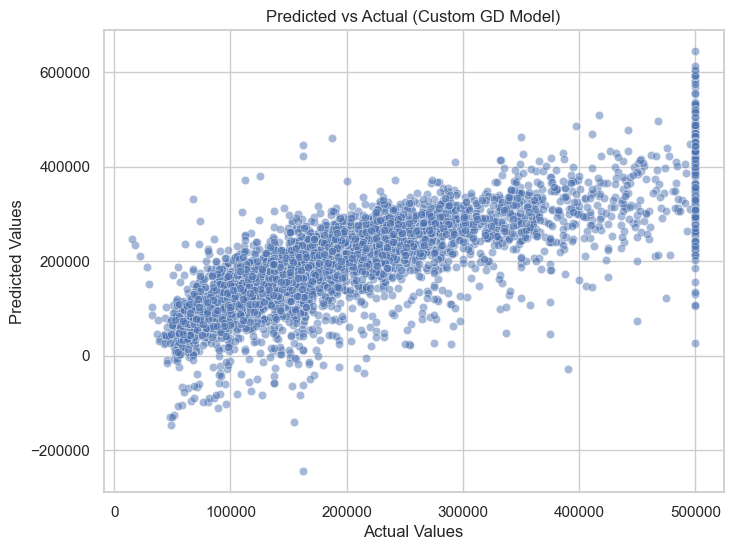

In [9]:
# Plot: Predicted vs Actual (Custom GD Model)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_custom, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Custom GD Model)")
plt.show()

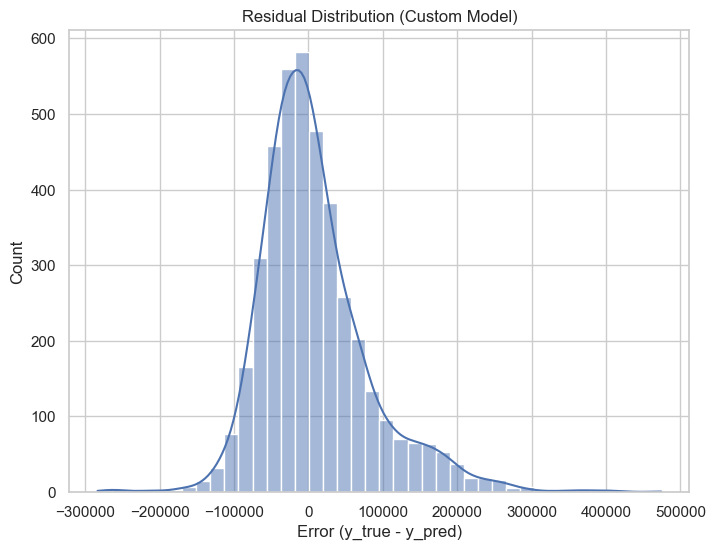

In [10]:
# Plot: Residuals Distribution
residuals = y_test.to_numpy() - y_pred_custom

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residual Distribution (Custom Model)")
plt.xlabel("Error (y_true - y_pred)")
plt.show()

In [11]:
print("NaNs in X_train_scaled:", X_train_scaled.isna().sum().sum())
print("NaNs in X_test_scaled:", X_test_scaled.isna().sum().sum())


NaNs in X_train_scaled: 0
NaNs in X_test_scaled: 0
